In [1]:
import numpy as np
import math
import random as random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

/Users/belhalkarimi/adalid/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


RuntimeError: Python is not installed as a framework. The Mac OS X backend will not be able to function correctly if Python is not installed as a framework. See the Python documentation for more information on installing Python as a framework on Mac OS X. Please either reinstall Python as a framework, or try one of the other backends. If you are Working with Matplotlib in a virtual enviroment see 'Working with Matplotlib in Virtual environments' in the Matplotlib FAQ

The function to sample from

In [2]:
t = np.linspace(0,100,10000)
l = np.log(t+np.sqrt(1+t**2))+t**2
plt.plot(l,t)

NameError: name 'plt' is not defined

In [58]:
def f(t):
    return np.log(t+np.sqrt(1+t**2))+t**2

MH algorithm with gaussian proposal

In [66]:
g1 = mlab.bivariate_normal(3, 4, 1.0, 1.0, -1, -1, -0.8)

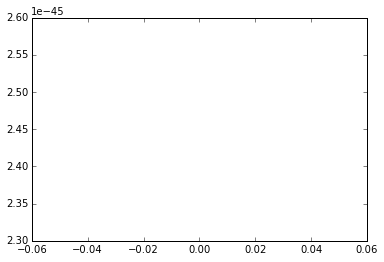

In [67]:
plt.plot(g1)

0.00632453617818


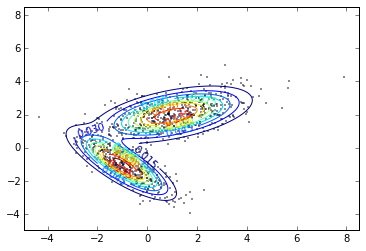

In [79]:
def q(x, y):
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return 0.6*g1+28.4*g2/(0.6+28.4)
 
'''Metropolis Hastings'''
N = 10000
s = 10
r = np.zeros(2)
p = q(r[0], r[1])
print p
samples = []
for i in xrange(N):
    rn = r + np.random.normal(size=2)
    pn = q(rn[0], rn[1])
    if pn >= p:
        p = pn
        r = rn
    else:
        u = np.random.rand()
        if u < pn/p:
            p = pn
            r = rn
    if i % s == 0:
        samples.append(r)
 
samples = np.array(samples)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)
 
'''Plot target'''
dx = 0.01
x = np.arange(np.min(samples), np.max(samples), dx)
y = np.arange(np.min(samples), np.max(samples), dx)
X, Y = np.meshgrid(x, y)
Z = q(X, Y)
CS = plt.contour(X, Y, Z, 10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

In [84]:
def q(x, y):
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return 0.6*g1+28.4*g2/(0.6+28.4)

len(np.gradient(q(x,y)))

1223

In [91]:
def q(x, y):
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return 0.6*g1+28.4*g2/(0.6+28.4)
 
'''Unadjusted Langevin'''
N = 10000
s = 10
r = np.zeros(2)
p = q(r[0], r[1])
print p
samples = []
for i in xrange(N):
    rn = r + np.gradient(q(rn[0],rn[1]))+ np.random.normal(size=2)
    pn = q(rn[0], rn[1])
    if pn >= p:
        p = pn
        r = rn
    else:
        u = np.random.rand()
        if u < pn/p:
            p = pn
            r = rn
    if i % s == 0:
        samples.append(r)
 
samples = np.array(samples)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)
 
'''Plot target'''
dx = 0.01
x = np.arange(np.min(samples), np.max(samples), dx)
y = np.arange(np.min(samples), np.max(samples), dx)
X, Y = np.meshgrid(x, y)
Z = q(X, Y)
CS = plt.contour(X, Y, Z, 10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

0.00632453617818


ValueError: operands could not be broadcast together with shapes (2,) (0,) 

In [92]:
np.random.normal(size=2)

array([-0.15011135, -0.86103039])

In [93]:
np.gradient(q(rn[0],rn[1]))

[]